# **TASK 3: EDA on Retail**

Perform Exploratory Data Analysis on Retail Dataset

As a business manager, try to find out weak areas where you can work to make more profit


In [1]:
import pandas as pd
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [2]:
df = pd.read_csv('../input/tsf-datasets/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.duplicated().sum()

17

In [6]:
df.drop_duplicates(inplace = True)

# **Correlation Analysis**

<AxesSubplot:>

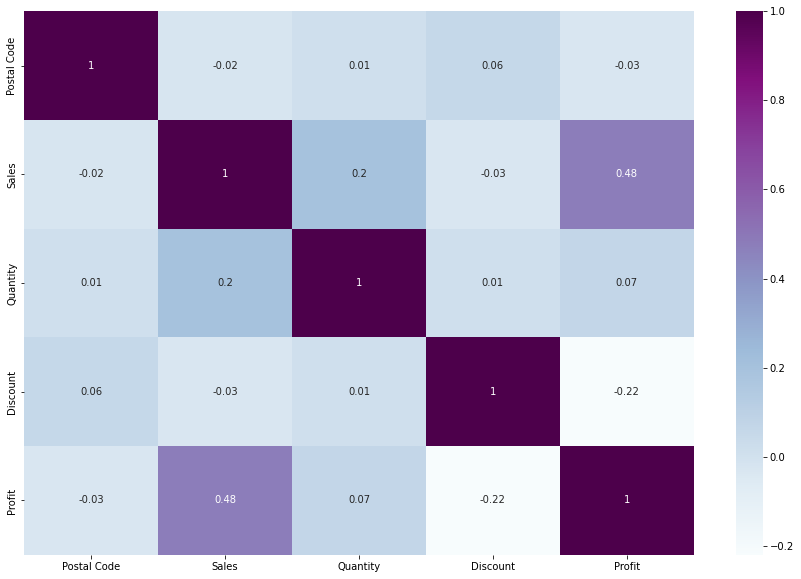

In [7]:
plt.figure(figsize = (15,10))
sns.heatmap(np.round(df.corr(),2), annot = True, cmap = 'BuPu')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Statewise Distribution'}, xlabel='State', ylabel='count'>

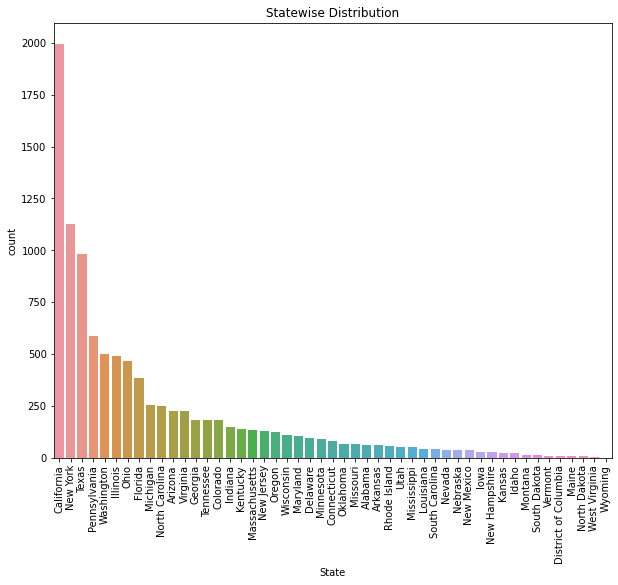

In [8]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 90)
plt.title("Statewise Distribution")
sns.countplot(df['State'],order = df['State'].value_counts().index)


In [9]:
region = df.groupby('Region')['Sales'].sum().sort_values(ascending = False).to_frame().reset_index()
px.bar(data_frame = region, x = 'Region', y ='Sales', color = 'Sales', template = 'xgridoff')
# plt.style.use('dark_background')

In [10]:
top_country = df.groupby('State')['Sales'].sum().sort_values(ascending = False).to_frame().reset_index().head(10)
px.bar(data_frame = top_country, x = 'State', y ='Sales', color = 'Sales')

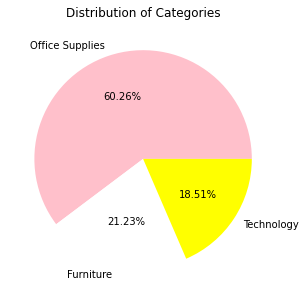

In [11]:
Category = df['Category'].value_counts()
colors = ('Pink','White','Yellow')

plt.figure(figsize = (10,5))
plt.title("Distribution of Categories")
plt.pie(Category, labels = Category.keys(), autopct='%.2f%%', colors = colors)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



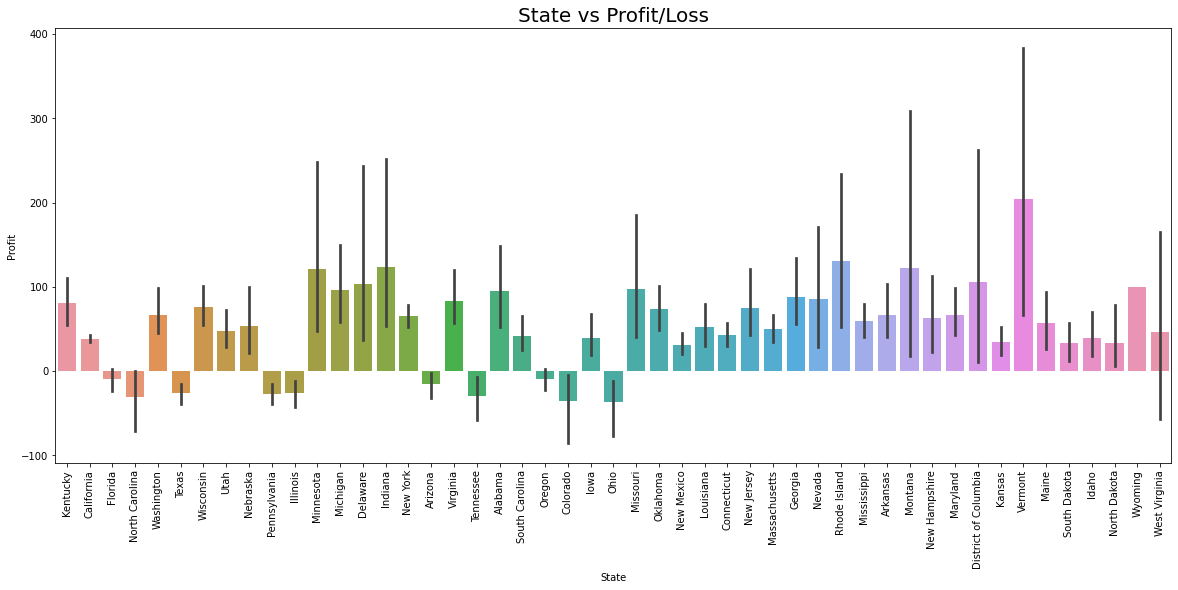

In [12]:
plt.figure(figsize=(20,8))
plt.title('State vs Profit/Loss',fontsize=20)
plt.xticks(rotation=90)
sns.barplot(df['State'],df['Profit']);

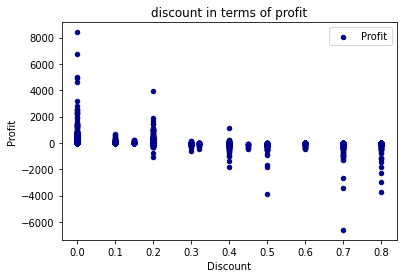

In [13]:
def scatter(data,x_axis,y_axis ,title):
    data.plot.scatter(x=x_axis, y=y_axis, color="DarkBlue", label="Profit")
    plt.title(title);
scatter(df,"Discount", "Profit" ,"discount in terms of profit")